In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-04 11:55:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  74.1MB/s    in 2.7s    

2025-04-04 11:55:50 (74.1 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 151.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 172.3 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 131.8 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
conn = sqlite3.connect('survey-data.sqlite')

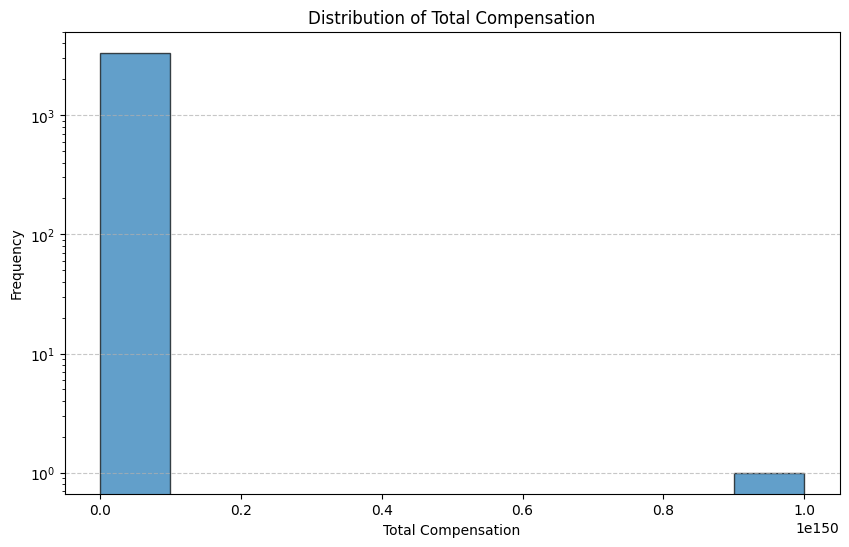

In [6]:
#1.1 Histogram of CompTotal (Total Compensation)
QUERY = """
SELECT CompTotal 
FROM main
GROUP BY CompTotal
ORDER BY CompTotal
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df["CompTotal"], bins=10, edgecolor="black", alpha=0.7)
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.title("Distribution of Total Compensation")
plt.yscale("log")  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


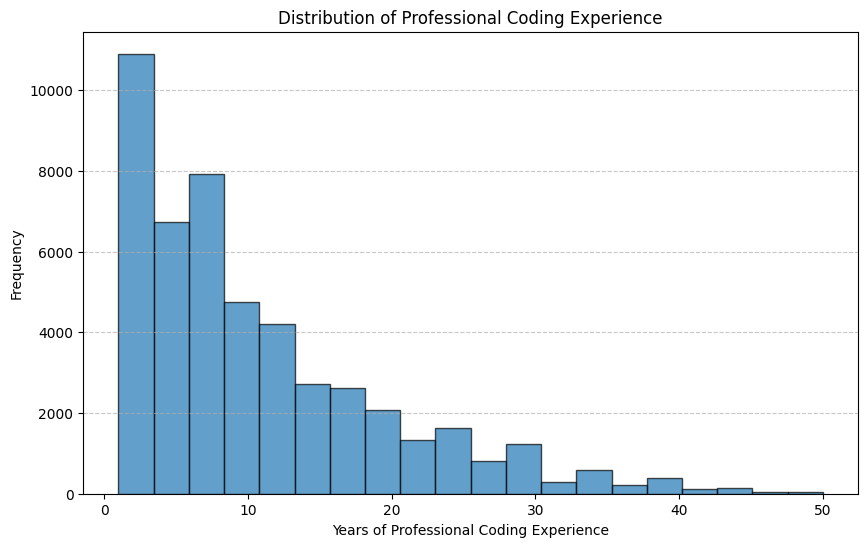

In [7]:
#1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)

QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df["YearsCodePro"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Frequency")
plt.title("Distribution of Professional Coding Experience")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [8]:
!pip install seaborn
import seaborn as sns

/tmp/ipykernel_355/4114934460.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")


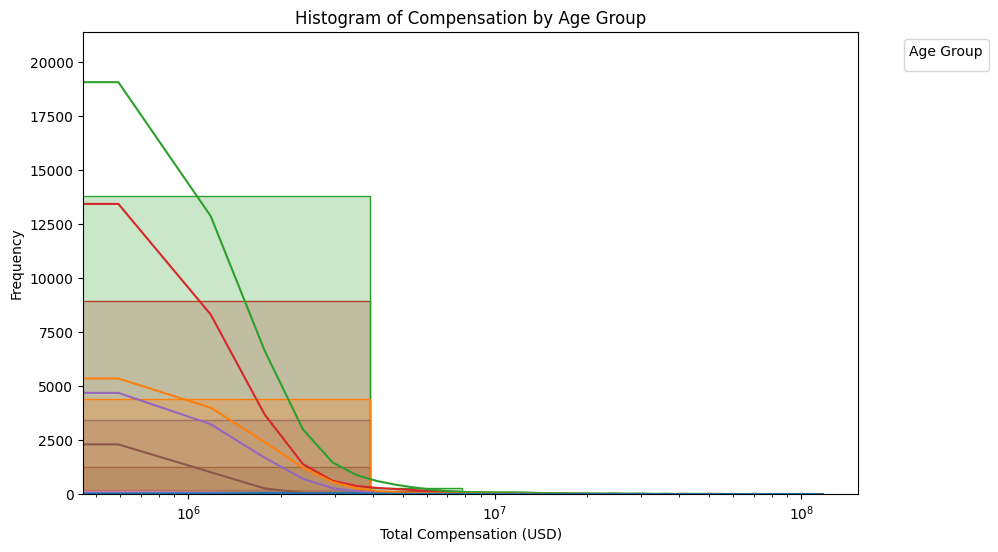

In [11]:
#2.1 Histogram Comparison of CompTotal by Age Group
QUERY = """ SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL; """ 
df = pd.read_sql_query(QUERY, conn)
age_order = [ "Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older" ]
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce") 
df = df.dropna(subset=["CompTotal", "Age"])
q99 = df["CompTotal"].quantile(0.99) 
df_filtered = df[df["CompTotal"] < q99]
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df_filtered, x="CompTotal", hue="Age", bins=30, kde=True, element="step")
plt.xlabel("Total Compensation (USD)") 
plt.ylabel("Frequency") 
plt.title("Histogram of Compensation by Age Group") 
plt.xscale("log")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

NameError: name 'handles' is not defined

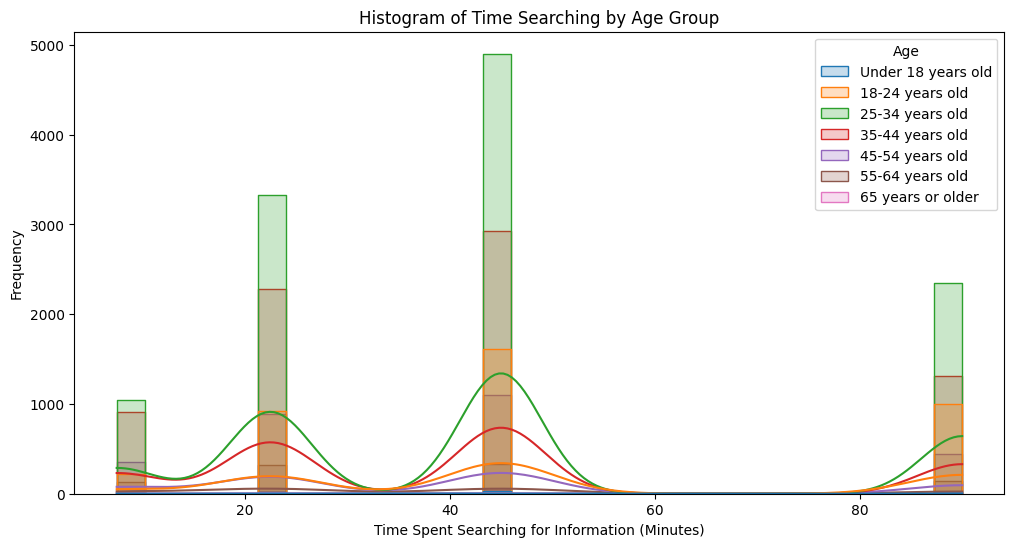

In [15]:
#2.2 Histogram of TimeSearching for Different Age Groups
QUERY = """ SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL; """ 
df = pd.read_sql_query(QUERY, conn)
age_order = [ "Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older" ]
time_mapping = { "Less than 15 minutes a day": 7.5, "15-30 minutes a day": 22.5, "30-60 minutes a day": 45, "60-120 minutes a day": 90, "More than 4 hours a day": 270 }
df["TimeSearching"] = df["TimeSearching"].map(time_mapping)
df = df.dropna(subset=["TimeSearching"])
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)
df["TimeSearching"] = pd.to_numeric(df["TimeSearching"], errors="coerce")
df.dropna(subset=["TimeSearching", "Age"])
df["Age"].nunique() > 1
plt.figure(figsize=(12, 6)) 
ax = sns.histplot(data=df, x="TimeSearching", hue="Age", bins=30, kde=True, element="step")
plt.xlabel("Time Spent Searching for Information (Minutes)") 
plt.ylabel("Frequency") 
plt.title("Histogram of Time Searching by Age Group")
labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
print("No valid Age groups available after filtering.")

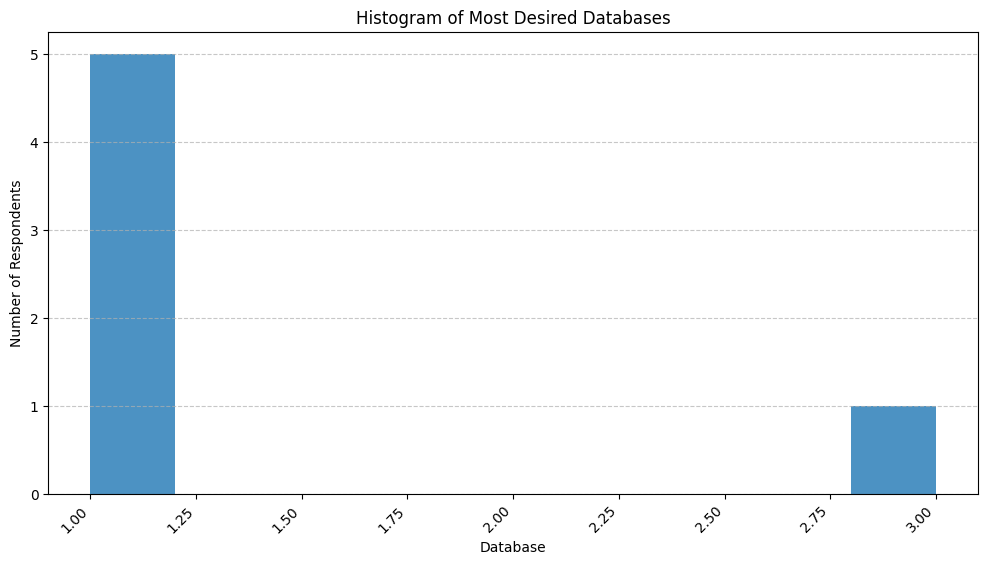

In [31]:
#3.1 Histogram of Most Desired Databases (DatabaseWantToWorkWith)
QUERY = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL LIMIT 5"
df = pd.read_sql_query(QUERY, conn)
df["DatabaseWantToWorkWith"] = df["DatabaseWantToWorkWith"].map
df["DatabaseWantToWorkWith"] = pd.Categorical(df["DatabaseWantToWorkWith"])
plt.figure(figsize=(12, 6))
db_counts.plot(kind="hist", color="#1f77b4", alpha=0.8)
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Most Desired Databases")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

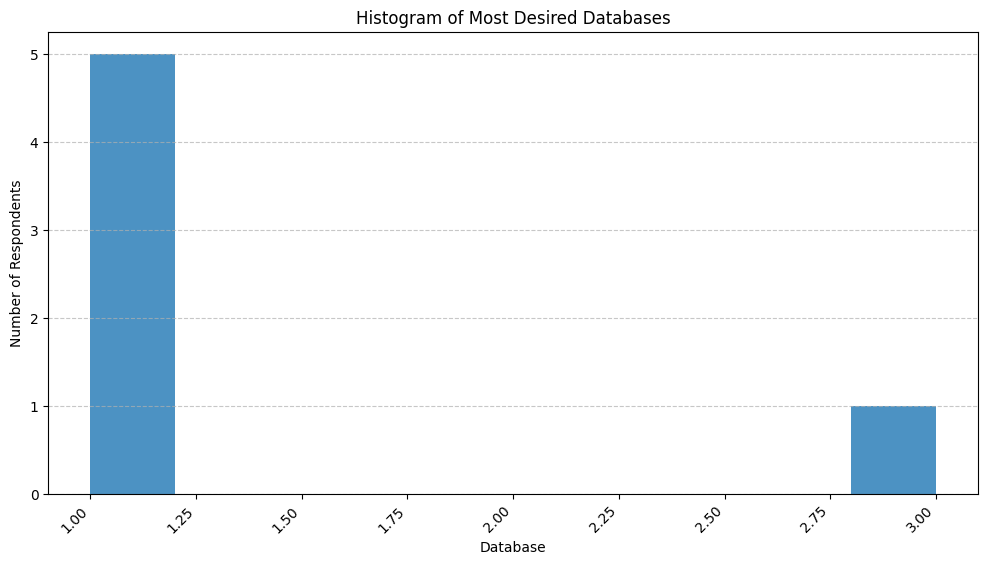

In [38]:
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) AS count 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL 
GROUP BY DatabaseWantToWorkWith 
ORDER BY count DESC 
LIMIT 5;
"""
df = pd.read_sql_query(QUERY,conn)

data = df['count']
labels = df['DatabaseWantToWorkWith']
plt.figure(figsize=(12, 6))
db_counts.plot(kind="hist", color="#1f77b4", alpha=0.8)
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Most Desired Databases")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

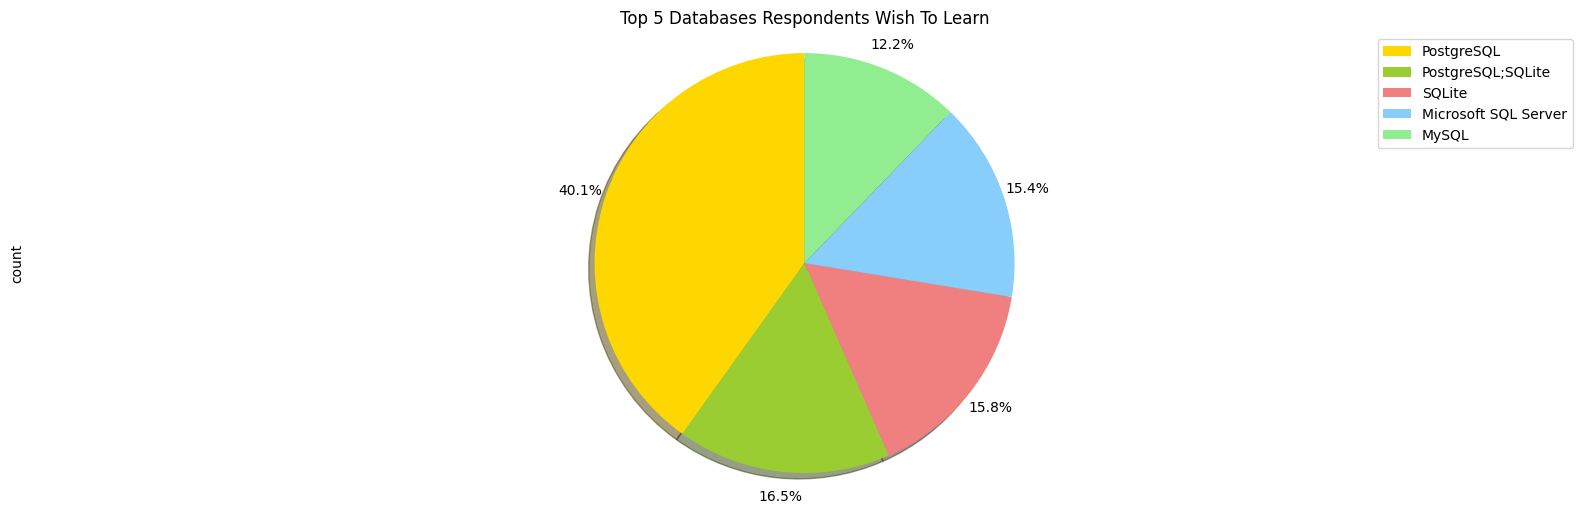

In [42]:
QUERY = """ 
SELECT DatabaseWantToWorkWith, COUNT(*) as count 
from main
group by DatabaseWantToWorkWith
order by count(DatabaseWantToWorkWith) DESC LIMIT 5 
""" 

df=pd.read_sql_query(QUERY,conn)  
df.set_index('DatabaseWantToWorkWith', inplace=True)

colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df['count'].plot(kind='pie', figsize=(20,6), autopct='%1.1f%%', labels=None, startangle=90, colors=colors_list, shadow=True, pctdistance=1.12)  

plt.legend(labels=df.index, loc='upper right')
plt.title('Top 5 Databases Respondents Wish To Learn') 
plt.axis('equal')
plt.show()

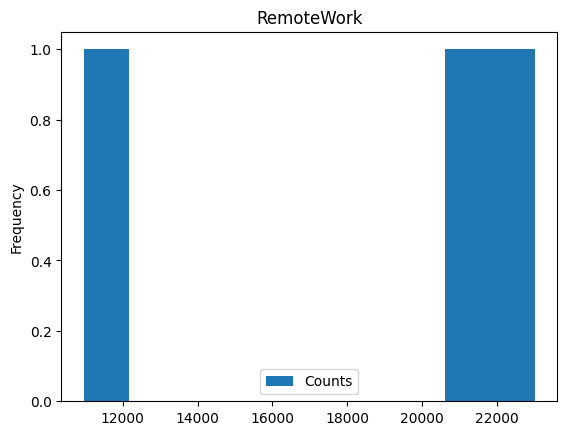

In [43]:
#3.2 Histogram of Preferred Work Locations (RemoteWork)
QUERY = """
SELECT RemoteWork
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df_cnt=df['RemoteWork'].value_counts().rename_axis('RemoteWork').reset_index(name='Counts')

df_cnt.plot(kind='hist')
plt.title('RemoteWork')
plt.show()

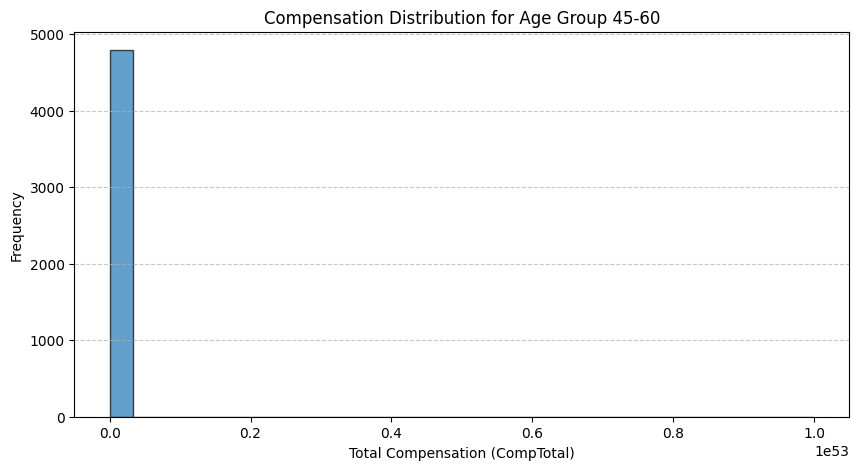

In [44]:
#4.1 Histogram of Median CompTotal for Ages 45 to 60
conn = sqlite3.connect('survey-data.sqlite')

# SQL Query to get compensation data for ages 45 to 60
QUERY = """
SELECT CompTotal 
FROM main 
WHERE Age BETWEEN 45 AND 60 
AND CompTotal IS NOT NULL;
"""

# Load the result into a Pandas DataFrame
df = pd.read_sql(QUERY, conn)

plt.figure(figsize=(10, 5))
plt.hist(df["CompTotal"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Frequency")
plt.title("Compensation Distribution for Age Group 45-60")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

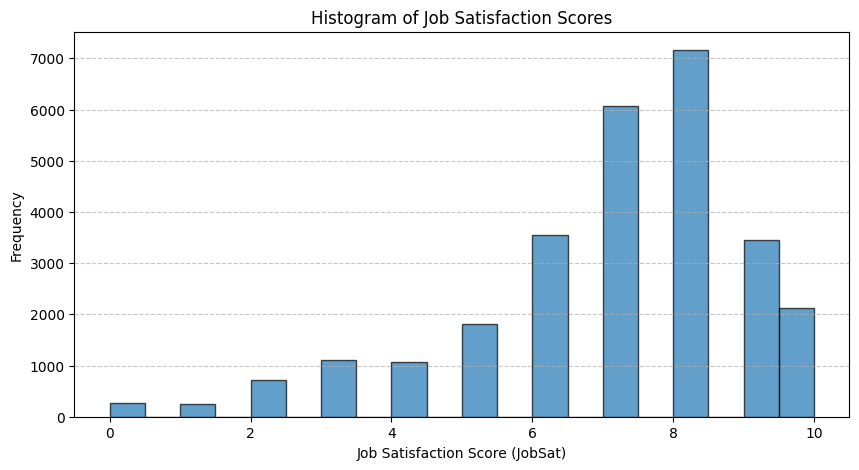

In [45]:
#4.2 Histogram of Job Satisfaction (JobSat) by YearsCodePro
conn = sqlite3.connect('survey-data.sqlite')

# SQL Query to get JobSat scores and YearsCodePro
QUERY = """
SELECT JobSat, YearsCodePro 
FROM main 
WHERE JobSat IS NOT NULL 
AND YearsCodePro IS NOT NULL;
"""
df = pd.read_sql(QUERY, conn)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

# Convert JobSat to numeric if needed
df["JobSat"] = pd.to_numeric(df["JobSat"], errors='coerce')

# Drop NaN values after conversion
df.dropna(inplace=True)

# Plot histogram of JobSat scores
plt.figure(figsize=(10, 5))
plt.hist(df["JobSat"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Job Satisfaction Score (JobSat)")
plt.ylabel("Frequency")
plt.title("Histogram of Job Satisfaction Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [46]:
conn.close()